In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

In [2]:
# Load the dataset
data = pd.read_csv('HW1.csv', header=0)
data.head()
M = len(data)

In [3]:
data.describe()

,X1,X2,X3,Y
count,100.000000,100.000000,100.000000,100.000000
mean,2.000000,2.000000,1.960000,1.851276
std,1.172181,1.172154,1.163005,2.774643
min,0.000000,0.070303,0.027879,-5.332455
25%,1.000000,0.979394,0.952121,0.527533
50%,2.000000,2.009697,1.949091,2.879003
75%,3.000000,3.040000,2.946061,3.925389
max,4.000000,3.949091,3.943030,5.545892


In [4]:
# Separate feature and labels, create number of training examples(should be equal)
x1 = data.values[:, 0]
x2 = data.values[:, 1]
x3 = data.values[:, 2]
y = data.values[:, 3]
m = len(x1) #len(x1) == len(x2) == len(x3)
n = len(y)

#print first 5 rows and total number of training samples
print('X1 = ', x1[: 5])
print('X2 = ', x2[: 5])
print('X3 = ', x3[: 5])
print('Y = ', y[: 5])

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


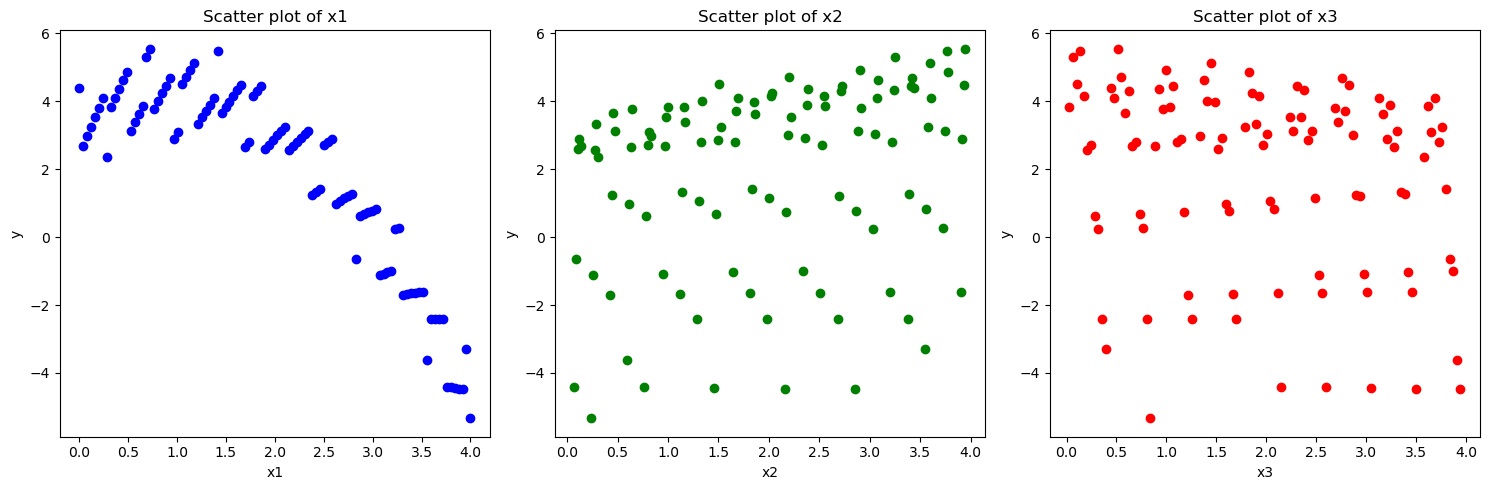

In [133]:
# Create scatter subplots of x1, x2, and x3
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for x1 vs y
axs[0].scatter(x1, y, color='blue')
axs[0].set_xlabel('x1')
axs[0].set_ylabel('y')
axs[0].set_title('Scatter plot of x1')

# Scatter plot for x2 vs y
axs[1].scatter(x2, y, color='green')
axs[1].set_xlabel('x2')
axs[1].set_ylabel('y')
axs[1].set_title('Scatter plot of x2')

# Scatter plot for x3 vs y
axs[2].scatter(x3, y, color='red')
axs[2].set_xlabel('x3')
axs[2].set_ylabel('y')
axs[2].set_title('Scatter plot of x3')

# Show the plots
plt.tight_layout()
plt.show()

In [8]:
#Create column vector of ones.
x_0 = np.ones((m, 1))
x_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
#Reshape x1
x_1 = x1.reshape(m, 1)
x_1[:5]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616]])

In [10]:
#Reshape x2
x_2 = x2.reshape(m, 1)
x_2[:5]

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798]])

In [11]:
#Reshape x3
x_3 = x3.reshape(m, 1)
x_3[:5]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939]])

In [12]:
#Horizonatally stack x_0 and x_1
x1_1 = np.hstack((x_0, x_1))
x1_1[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [13]:
#Horizonatally stack x_0 and x_2
x2_2 = np.hstack((x_0, x_2))
x2_2[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [14]:
#Horizonatally stack x_0 and x_3
x3_3 = np.hstack((x_0, x_3))
x3_3[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [91]:
#Create theta
theta = np.zeros(2)
theta

array([0., 0.])

In [16]:
#Create compute cost function
def compute_cost(X, y, theta):
    """
     Compute cost for linear regression.
     Input Parameters
     ----------------
     X : 2D array where each row represent the training example and each column represent
     m= number of training examples
     n= number of features (including X_0 column of ones)
     y : 1D array of labels/target value for each traing example. dimension(1 x m)
     theta : 1D array of fitting parameters or weights. Dimension (1 x n)
     Output Parameters
     -----------------
     J : Scalar value.
     """
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [17]:
#Create gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute cost for linear regression.
    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
    m= number of training examples
    n= number of features (including X_0 column of ones)
    y : 1D array of labels/target value for each traing example. dimension(m x 1)
    theta : 1D array of fitting parameters or weights. Dimension (1 x n)
    alpha : Learning rate. Scalar value
    iterations: No of iterations. Scalar value.
    Output Parameters
    -----------------
    theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
    cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

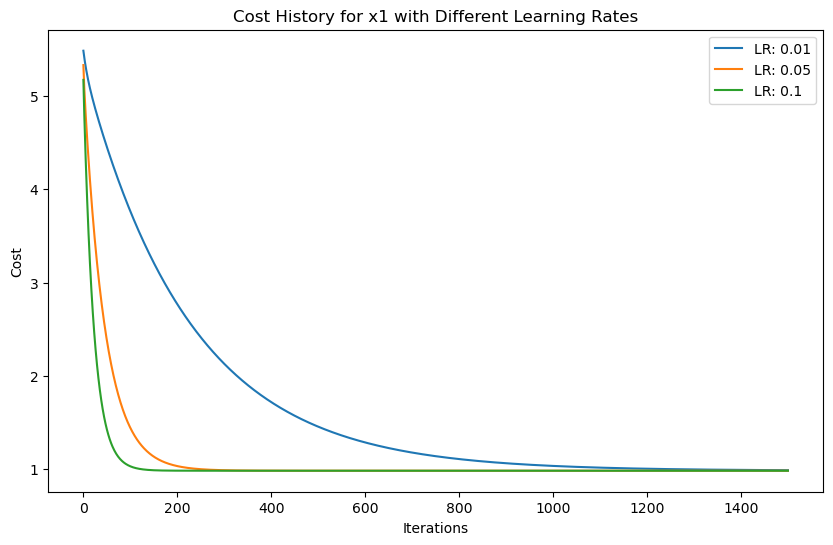

In [97]:
learning_rates = [0.01, 0.05, 0.1]
iterations = 1500

for alpha in learning_rates:
    theta_x1, cost_history_x1 = gradient_descent(x1_1, y, theta, alpha, iterations)
    plt.plot(range(iterations), cost_history_x1, label=f'LR: {alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for x1 with Different Learning Rates')
plt.legend()
plt.show()


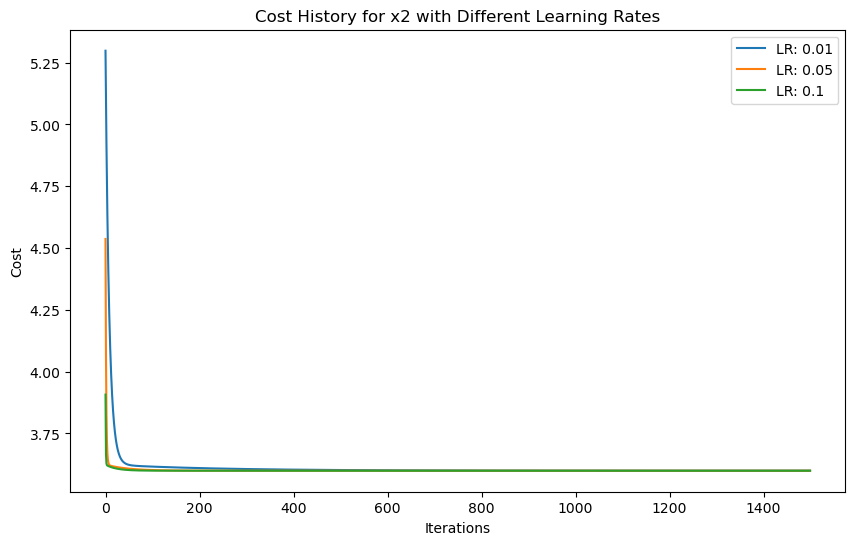

In [105]:
for alpha in learning_rates:
    theta_x2, cost_history_x2 = gradient_descent(x2_2, y, theta, alpha, iterations)
    plt.plot(range(iterations), cost_history_x2, label=f'LR: {alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for x2 with Different Learning Rates')
plt.legend()
plt.show()


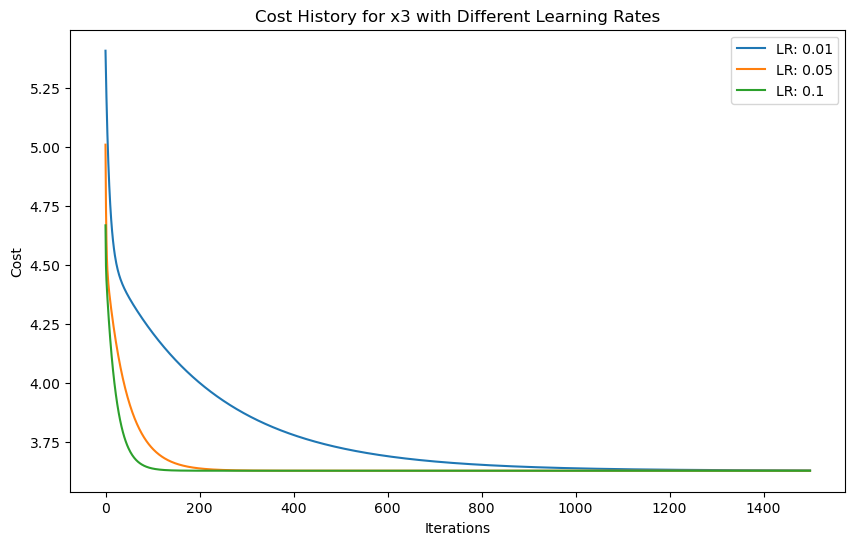

In [103]:
for alpha in learning_rates:
    theta_x3, cost_history_x3 = gradient_descent(x3_3, y, theta, alpha, iterations)
    plt.plot(range(iterations), cost_history_x3, label=f'LR: {alpha}')

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for x3 with Different Learning Rates')
plt.legend()
plt.show()


In [21]:
#Setting iterations and using best alpha.
iterations = 1500
alpha = 0.10

In [ ]:
#Gradient descent of x1 with 0.10 as alpha

theta1, cost_history1 = gradient_descent(x1_1, y, theta, alpha3, iterations)
print('Final value of theta =', theta1)
print('cost_history =', cost_history1)

In [29]:
#Gradient descent of x2 with 0.10 as alpha

theta2, cost_history2 = gradient_descent(x2_2, y, theta, alpha3, iterations)
print('Final value of theta =', theta2)
print('cost_history =', cost_history2)

Final value of theta = [0.73606043 0.55760761]
cost_history = [5.29831663 5.09909109 4.92356115 ... 3.5993997  3.59939955 3.5993994 ]


In [30]:
#Gradient descent of x3 with 0.10 as alpha

theta3, cost_history3 = gradient_descent(x3_3, y, theta, alpha3, iterations)
print('Final value of theta =', theta3)
print('cost_history =', cost_history3)

Final value of theta = [ 2.8714221  -0.52048288]
cost_history = [5.40768785 5.30397076 5.21178297 ... 3.63053597 3.6305311  3.63052625]


In [107]:
# Final cost for each explanatory variable
final_cost_x1 = cost_history_x1[-1]
final_cost_x2 = cost_history_x2[-1]
final_cost_x3 = cost_history_x3[-1]

print(f'Final Cost for x1: {final_cost_x1}')
print(f'Final Cost for x2: {final_cost_x2}')
print(f'Final Cost for x3: {final_cost_x3}')

# Determine which variable has the lowest cost
lowest_cost = min(final_cost_x1, final_cost_x2, final_cost_x3)
if lowest_cost == final_cost_x1:
    best_variable = 'x1'
elif lowest_cost == final_cost_x2:
    best_variable = 'x2'
else:
    best_variable = 'x3'

print('The explanatory variable with the lowest cost is:', best_variable)

Final Cost for x1: 0.9849930825405946
Final Cost for x2: 3.599366018168041
Final Cost for x3: 3.6294511246079155
The explanatory variable with the lowest cost is: x1


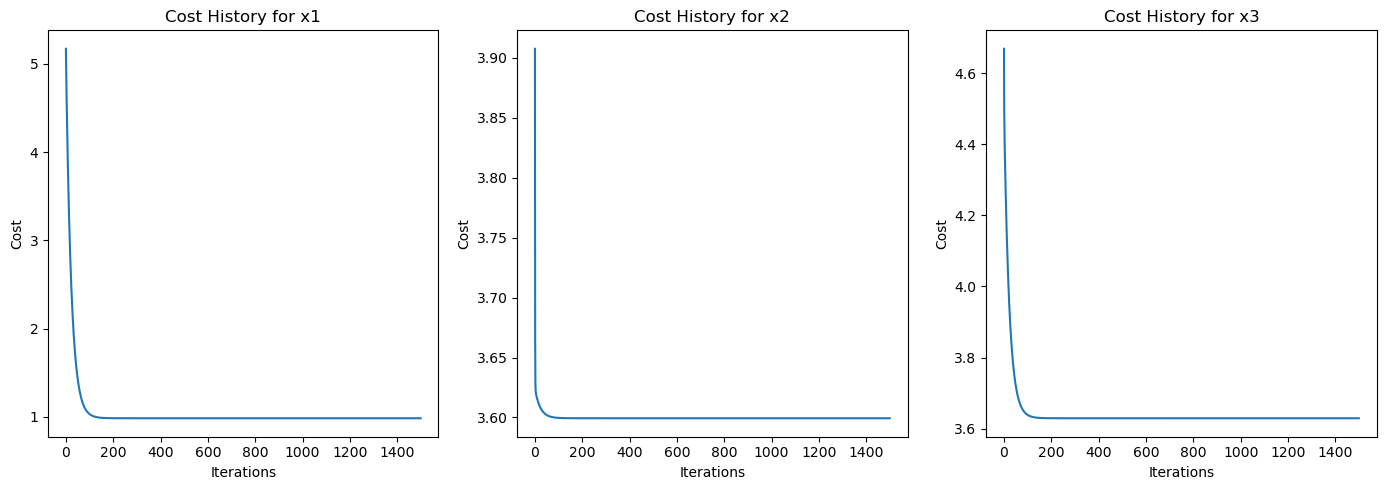

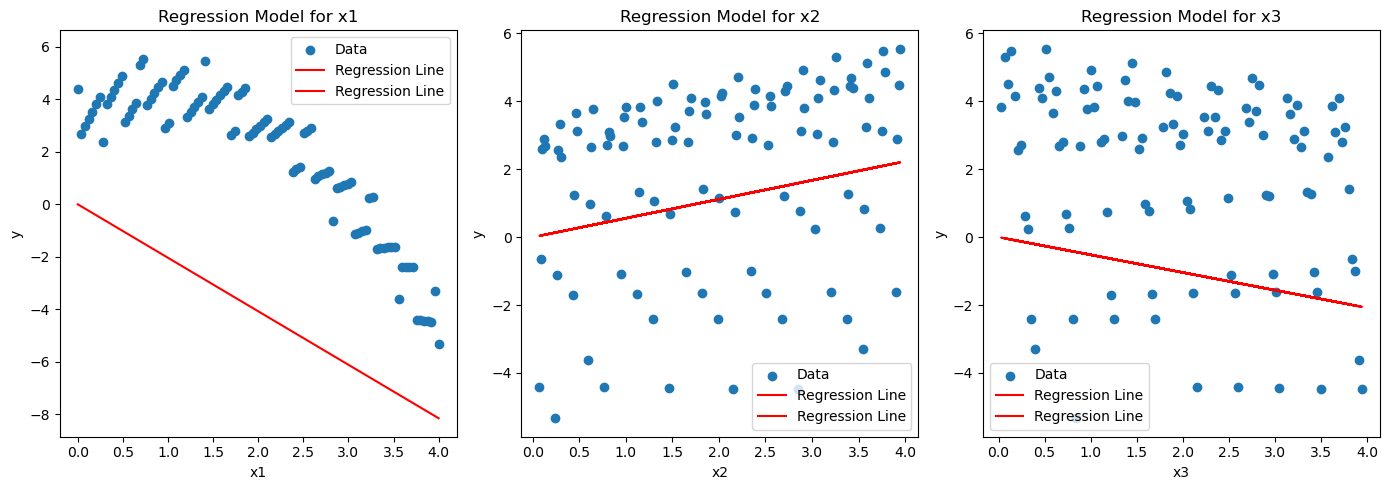

In [129]:
# Plot cost history
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.plot(range(iterations), cost_history_x1, label='x1')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for x1')

plt.subplot(1, 3, 2)
plt.plot(range(iterations), cost_history_x2, label='x2')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for x2')

plt.subplot(1, 3, 3)
plt.plot(range(iterations), cost_history_x3, label='x3')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for x3')

plt.tight_layout()
plt.show()

# Plot regression models
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(x1, y, label='Data')
plt.plot(x1_1, theta_x1 * x1_1, color='red', label='Regression Line')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Regression Model for x1')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x2, y, label='Data')
plt.plot(x2_2, theta_x2 * x2_2, color='red', label='Regression Line')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Regression Model for x2')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(x3, y, label='Data')
plt.plot(x3_3, theta_x3 * x3_3, color='red', label='Regression Line')
plt.xlabel('x3')
plt.ylabel('y')
plt.title('Regression Model for x3')
plt.legend()

plt.tight_layout()
plt.show()


In [77]:
#Stacking of x1, x2, and x3 for multivariate linear regression.
X = np.vstack((np.ones(len(x1)), x1, x2, x3)).T

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [115]:
# Set learning rate and number of iterations
learning_rates = [0.01, 0.05, 0.1]
theta0 = np.zeros(4)

best_theta = None
lowest_cost = float('inf')
best_alpha = None
best_cost_history = None

for alpha in learning_rates:
    theta, cost_history = gradient_descent(X, y, theta0, alpha, iterations)
    final_cost = cost_history[-1]
    print('Learning Rate: ', alpha, ', Final Cost: ', final_cost)
    if final_cost < lowest_cost:
        lowest_cost = final_cost
        best_theta = theta
        best_alpha = alpha
        best_cost_history = cost_history

print('Best Learning Rate: ', best_alpha ,', Lowest Cost: ',lowest_cost)
print('Best Theta: ',best_theta)


Learning Rate:  0.01 , Final Cost:  0.8105104429083866
Learning Rate:  0.05 , Final Cost:  0.7384646851794183
Learning Rate:  0.1 , Final Cost:  0.7384642415684212
Best Learning Rate:  0.1 , Lowest Cost:  0.7384642415684212
Best Theta:  [ 5.31416563 -2.00371905  0.53256359 -0.26560164]


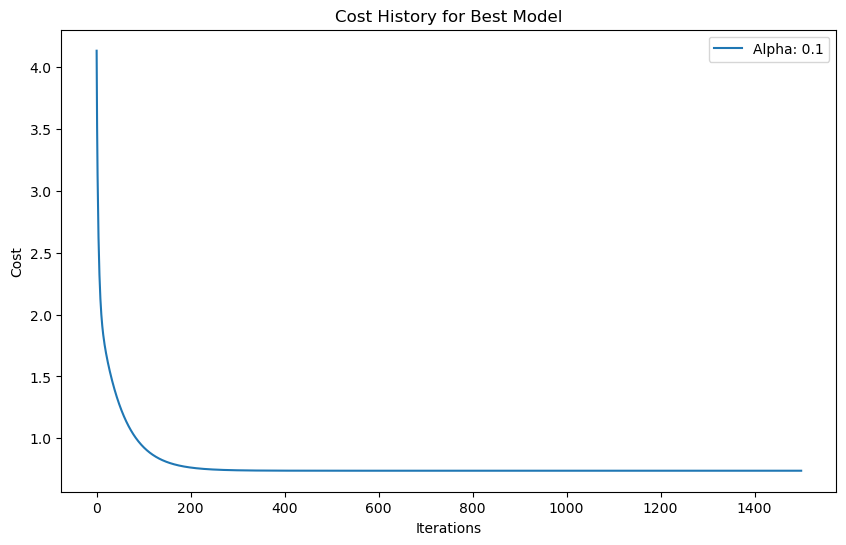

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), best_cost_history, label=f'Alpha: {best_alpha}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History for Best Model')
plt.legend()
plt.show()


In [109]:
# Predict the value of y for new (X1, X2, X3) values
new_values = np.array([
    [1, 1, 1, 1],  # Including bias term (1,1,1)
    [1, 2, 0, 4],  # Including bias term (2,0,4)
    [1, 3, 2, 1]   # Including bias term (3,2,1)
])

predictions = new_values.dot(best_theta)
for i, pred in enumerate(predictions):
    print('Prediction for ', new_values[i, 1:], ': ', pred)

Prediction for  [1 1 1] :  3.5774085293454614
Prediction for  [2 0 4] :  0.2443209702176521
Prediction for  [3 2 1] :  0.10253401973591902
